In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")


In [15]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [5]:
df.isna()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

In [7]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [8]:
df["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [11]:
cnt = 0
for row in df["OWN_OCCUPIED"]:
    try :
        int(row)
        df.loc[cnt, "OWN_OCCUPIED"] = np.nan
    except ValueError:
        pass
    cnt += 1

In [12]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,NaN,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [16]:
# akan assign 1 jika "Y" selain itu 0
df["NEW_OWN_OCCUPIED"] = df["OWN_OCCUPIED"].apply(
    lambda val : 1 if val == 'Y' else 0
)

In [17]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,NEW_OWN_OCCUPIED
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,1
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,0
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,0
4,NaN,203.0,BERKELEY,Y,3,2,1600,1
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,1
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950,0
7,100008000.0,213.0,TREMONT,Y,--,1,NaN,1
8,100009000.0,215.0,TREMONT,Y,na,2,1800,1


In [23]:
#handle unkown value
idx = 0
for value in df["NUM_BATH"]:
    try :
        int(value)
        df.loc[idx, "NEW_NUM_BATH"] = value
    except ValueError:
        df.loc[idx, "NEW_NUM_BATH"] = np.nan
    idx += 1

In [24]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,NEW_OWN_OCCUPIED,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,1,1
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850,0,1
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,0,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,1,2
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,1,1
6,100007000.0,NaN,WASHINGTON,NaN,2,NaN,950,0,NaN
7,100008000.0,213.0,TREMONT,Y,--,1,NaN,1,1
8,100009000.0,215.0,TREMONT,Y,na,2,1800,1,2


In [22]:
int(1.5)

1

In [29]:
# inplace langsung update di variabel
df["ST_NUM"].fillna(125,inplace=True)

In [30]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,NEW_OWN_OCCUPIED,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,Y,3,1,1000,1,1
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--,0,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850,0,1
3,100004000.0,201.0,BERKELEY,12,1,NaN,700,0,NaN
4,NaN,203.0,BERKELEY,Y,3,2,1600,1,2
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800,1,1
6,100007000.0,125.0,WASHINGTON,NaN,2,NaN,950,0,NaN
7,100008000.0,213.0,TREMONT,Y,--,1,NaN,1,1
8,100009000.0,215.0,TREMONT,Y,na,2,1800,1,2


In [33]:
mean_num_bedrooms = df.NUM_BEDROOMS.mean()
median_num_bedrooms = df.NUM_BEDROOMS.median()
df["NUM_BEDROOMS"].fillna(median_num_bedrooms, inplace=True)

TypeError: can only concatenate str (not "int") to str

In [34]:
!pip install xlr

  ERROR: Could not find a version that satisfies the requirement xlr (from versions: none)
ERROR: No matching distribution found for xlr


In [35]:
obes = pd.ExcelFile("data/obes.xls")

In [36]:
obes

In [37]:
obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [56]:
obes_age = obes.parse("7.2",skiprows = 4, skipfooter=14)

In [57]:
obes_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [42]:
df_obes = pd.read_excel("data/obes.xls", sheet_name = "7.2")

In [43]:
df_obes

,"Table 7.2 Finished Admission Episodes with a primary diagnosis of obesity, by age group, 2002/03 to 2012/13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Numbers
3,NaN,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2002/03,1275,400,65,136,289,216,94,52,23
6,2003/04,1711,579,67,174,391,273,151,52,24
7,2004/05,2035,547,107,287,487,364,174,36,32
8,2005/06,2564,583,96,341,637,554,258,72,20
9,2006/07,3862,656,184,461,1069,872,459,118,43


In [62]:
# rename kolom
obes_age.rename(
    columns = {'Unnamed: 0': "Year"}, inplace=True
)

In [63]:
obes_age.dropna(axis=0, inplace=True)

In [64]:
obes_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [66]:
obes_age.set_index('Year', inplace = True)

In [67]:
obes_age

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


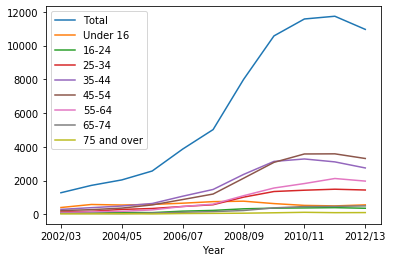

In [71]:
obes_age.plot()

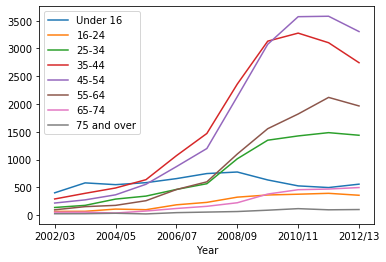

In [72]:
obes_age.drop("Total",axis = 1).plot()

In [ ]:
obes_age[]

In [73]:
from datetime import datetime

In [74]:
datetime.now()

datetime.datetime(2020, 10, 8, 21, 33, 7, 341475)

In [76]:
datetime.now().time()

datetime.time(21, 33, 57, 422028)

In [78]:
date_range = pd.date_range(
    start = '1/01/2020', end = '1/08/2020', freq = 'H'
)

In [79]:
date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [83]:
df = pd.DataFrame(date_range, columns = ["date"])

In [84]:
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [88]:
ops_daily = pd.read_csv(
    "https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv",
    parse_dates= True, index_col = 0
)

In [89]:
ops_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [90]:
ops_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [93]:
ops_daily['Year'] = ops_daily.index.year
ops_daily['Month'] = ops_daily.index.month
ops_daily['Day'] = ops_daily.index.day
ops_daily['Weekday'] = ops_daily.index.weekday

In [94]:
ops_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day,Weekday
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,1,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,2,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,3,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,4,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,5,3
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,27,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,28,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,29,4


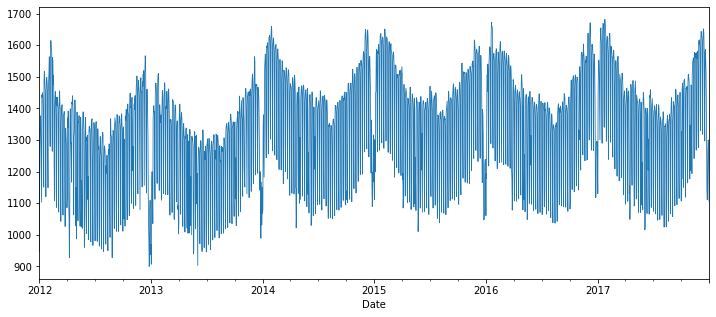

In [96]:
ops_daily.loc["2012":"2017","Consumption"].plot(
    linewidth=.8,
    figsize = (12,5)
)